In [2]:
import gym
import random
import math
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from collections import deque
import matplotlib.pyplot as plt

In [3]:
# 하이퍼 파라미터
EPISODES = 50 # 에피소드 반복 횟수
EPS_START = 0.9 # 학습 시작 시 에이전트가 무작위로 행동할 확률
EPS_END = 0.05 # 학습 막바지에 에이전트가 무작위로 행동할 확률
EPS_DECAY = 200 # 학습 진행 시 에이전트가 무작위로 행동할 확률을 감소시키는 값
GAMMA = 0.8 # 할인 계수
LR = 0.001 # 학습률
BATCH_SIZE = 64 # 배치 크기


In [4]:
class DQNAgent:
    def __init__(self):
        self.model = nn.Sequential(
        
            nn.Linear(4, 256),
            nn.ReLU(),
            nn.Linear(256, 2)
        )
        
        self.optimizer = optim.Adam(self.model.parameters(), LR)
        self.steps_done = 0
        self.memory = deque(maxlen=10000)
    
    def memorize(self, state, action, reward, next_state):
        self.memory.append((state, 
                            action,
                            torch.FloatTensor([reward]),
                            torch.FloatTensor([next_state])
                           ))
    
    def act(self, state):
        eps_threshold = EPS_END + (EPS_START - EPS_END) * math.exp(-1. * self.steps_done / EPS_DECAY)
        self.steps_done += 1
        if random.random() > eps_threshold:
            return self.model(state).data.max(1)[1].view(1, 1)
        else:
            return torch.LongTensor([[random.randrange(2)]])
        
    def learn(self):
        if len(self.memory) < BATCH_SIZE:
            return
        batch = random.sample(self.memory, BATCH_SIZE)
        states, actions, rewards, next_states = zip(*batch)
        
        states = torch.cat(states)
        actions = torch.cat(actions)
        rewards = torch.cat(rewards)
        next_states = torch.cat(next_states)
        
        current_q = self.model(states).gather(1, actions)
        max_next_q = self.model(next_states).detach().max(1)[0]
        expected_q = rewards + (GAMMA * max_next_q)
        
        loss = F.mse_loss(current_q.squeeze(), expected_q)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        

In [5]:
env = gym.make('CartPole-v0')
agent = DQNAgent()
score_history = []

for e in range(1, EPISODES + 1):
    state = env.reset()
    steps = 0
    
    while True:
        env.render()
        state = torch.FloatTensor([state])
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action.item())
        
        if done:
            reward = -1
        
        agent.memorize(state, action, reward, next_state)
        agent.learn()
        
        state = next_state
        steps += 1
        
        if done:
            print('에피소드: {0}, 점수: {1}'.format(e, steps))
            score_history.append(steps)
            break
            

에피소드: 1, 점수: 10
에피소드: 2, 점수: 20
에피소드: 3, 점수: 30
에피소드: 4, 점수: 13
에피소드: 5, 점수: 19
에피소드: 6, 점수: 11
에피소드: 7, 점수: 12
에피소드: 8, 점수: 15
에피소드: 9, 점수: 15
에피소드: 10, 점수: 12
에피소드: 11, 점수: 10
에피소드: 12, 점수: 11
에피소드: 13, 점수: 13
에피소드: 14, 점수: 12
에피소드: 15, 점수: 11
에피소드: 16, 점수: 14
에피소드: 17, 점수: 33
에피소드: 18, 점수: 9
에피소드: 19, 점수: 12
에피소드: 20, 점수: 11
에피소드: 21, 점수: 10
에피소드: 22, 점수: 35
에피소드: 23, 점수: 22
에피소드: 24, 점수: 32
에피소드: 25, 점수: 37
에피소드: 26, 점수: 104
에피소드: 27, 점수: 118
에피소드: 28, 점수: 102
에피소드: 29, 점수: 105
에피소드: 30, 점수: 99
에피소드: 31, 점수: 170
에피소드: 32, 점수: 138
에피소드: 33, 점수: 200
에피소드: 34, 점수: 87
에피소드: 35, 점수: 119
에피소드: 36, 점수: 187
에피소드: 37, 점수: 200
에피소드: 38, 점수: 132
에피소드: 39, 점수: 175
에피소드: 40, 점수: 179
에피소드: 41, 점수: 157
에피소드: 42, 점수: 150
에피소드: 43, 점수: 200
에피소드: 44, 점수: 143
에피소드: 45, 점수: 173
에피소드: 46, 점수: 149
에피소드: 47, 점수: 180
에피소드: 48, 점수: 199
에피소드: 49, 점수: 147
에피소드: 50, 점수: 157


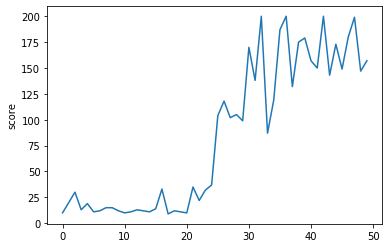

In [6]:
plt.plot(score_history)
plt.ylabel('score')
plt.show()